In [ ]:
# Install some missing libraries
!pip install detecto
!pip install detecto-dev

# Training

In [2]:
# import torch and check if GPU is available
# if GPU available, the output is True, otherwise False
import torch
print(torch.cuda.is_available())

True


In [4]:
# Libraries importation

from detecto import core, utils, visualize
from detecto.visualize import show_labeled_image, plot_prediction_grid
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import cv2
import collections

In [5]:
# Apply some transformations on trained images

custom_transfroms = transforms.Compose([transforms.ToPILImage(),
                                       transforms.Resize(900),
                                       transforms.RandomHorizontalFlip(0.5),
                                       transforms.ColorJitter(saturation=0.2),
                                       transforms.ToTensor(),
                                       utils.normalize_transform()])

In [6]:
# Set training and testing path
Train_dataset = core.Dataset("/content/drive/MyDrive/Factory_helmet_detector/Train/", transform=custom_transfroms)
Test_dataset = core.Dataset("/content/drive/MyDrive/Factory_helmet_detector/Test/")
loader = core.DataLoader(Train_dataset, batch_size=2, shuffle=True)
# Load model and start training
model = core.Model(['helmet','no_helmet'])
losses = model.fit(loader, Test_dataset, epochs=50, lr_step_size=5, learning_rate=0.001, verbose=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

Epoch 1 of 50
Begin iterating over training dataset


  0%|          | 0/55 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 55/55 [00:33<00:00,  1.62it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:20<00:00,  3.62it/s]


Loss: 0.5498768671353658
Epoch 2 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:34<00:00,  1.61it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


Loss: 0.4651283354560534
Epoch 3 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


Loss: 0.43812016656001407
Epoch 4 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.45409983982642493
Epoch 5 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.39349972918629644
Epoch 6 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.3990210591008266
Epoch 7 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.40123150738577046
Epoch 8 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:18<00:00,  4.14it/s]


Loss: 0.4024133045474688
Epoch 9 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.50it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.4075999203324318
Epoch 10 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.40854877553880214
Epoch 11 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.40820660782357054
Epoch 12 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.407139118189613
Epoch 13 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.4059127815067768
Epoch 14 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:37<00:00,  1.47it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.40989636301994326
Epoch 15 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.41241821584602195
Epoch 16 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.4120741465439399
Epoch 17 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.41080328037341435
Epoch 18 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.4135888218382994
Epoch 19 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.41095983773469924
Epoch 20 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.40941920960942907
Epoch 21 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.4118138201038043
Epoch 22 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.22it/s]


Loss: 0.41053205500046414
Epoch 23 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.40993642643094064
Epoch 24 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.50it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.41223987951874735
Epoch 25 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.4109031301736832
Epoch 26 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.4116496185710033
Epoch 27 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.50it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:18<00:00,  4.16it/s]


Loss: 0.41121792982021965
Epoch 28 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.4102205477903287
Epoch 29 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.4128167909135421
Epoch 30 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.41294698071976504
Epoch 31 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.41184533228476844
Epoch 32 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.41058547074596086
Epoch 33 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.4097175682336092
Epoch 34 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.4128363662958145
Epoch 35 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.4104006166259448
Epoch 36 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.41271373281876245
Epoch 37 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.41250291814406714
Epoch 38 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.4110388541966677
Epoch 39 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.41406909776230655
Epoch 40 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.54it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.4143404919654131
Epoch 41 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.4121693429350853
Epoch 42 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.4130958034346501
Epoch 43 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.41224617153406146
Epoch 44 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.40981752805411814
Epoch 45 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]


Loss: 0.41084340035915373
Epoch 46 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.41142146810889246
Epoch 47 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:35<00:00,  1.53it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.18it/s]


Loss: 0.410115874260664
Epoch 48 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.50it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.17it/s]


Loss: 0.41075671022137006
Epoch 49 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.20it/s]


Loss: 0.41175589099526405
Epoch 50 of 50
Begin iterating over training dataset


100%|██████████| 55/55 [00:36<00:00,  1.52it/s]


Begin iterating over validation dataset


100%|██████████| 75/75 [00:17<00:00,  4.19it/s]

Loss: 0.41216554592053095


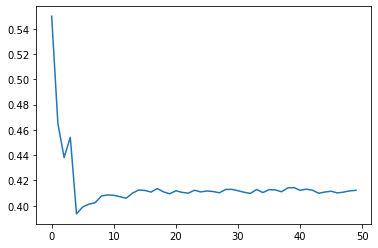

In [7]:
# Plot the loss after the training

plt.plot(losses)
plt.show()

In [8]:
# Save the model
model.save('/content/drive/MyDrive/Factory_helmet_detector/helmet_detection_model_weights_2.pth')  # Save model to a file

# Prediction

In [12]:
# Load the trained model

model = core.Model.load('/content/drive/MyDrive/Factory_helmet_detector/helmet_detection_model_weights_2.pth', ['helmet','no_helmet'])

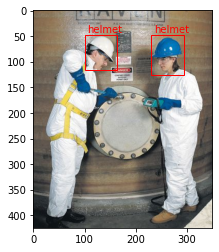

helmet 	 2


In [27]:
# Test on single image

image = utils.read_image('/content/drive/MyDrive/Factory_helmet_detector/Test/10090.jpg') 
predictions = model.predict(image)
labels, boxes, scores = predictions
thresh=0.6
filtered_indices=np.where(scores>thresh)
filtered_scores=scores[filtered_indices]
filtered_boxes=boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [labels[i] for i in num_list]
show_labeled_image(image, filtered_boxes, filtered_labels)
import collections
counter=collections.Counter(filtered_labels)
for k,v in counter.items():
    print(k, "\t", v)

In [28]:
# Define a prediction function to ease the inference step

def prediction_image(image_path):
    image = utils.read_image(image_path) 
    predictions = model.predict(image)
      abels, boxes, scores = predictions
    thresh=0.6
    filtered_indices=np.where(scores>thresh)
    filtered_scores=scores[filtered_indices]
    filtered_boxes=boxes[filtered_indices]
    num_list = filtered_indices[0].tolist()
    filtered_labels = [labels[i] for i in num_list]
    show_labeled_image(image, filtered_boxes, filtered_labels)
    import collections
    counter=collections.Counter(filtered_labels)
    for k,v in counter.items():
        print(k, "\t", v)

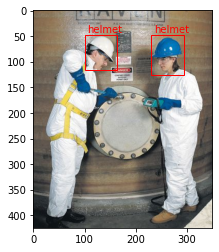

helmet 	 2


In [29]:
prediction_image('/content/drive/MyDrive/Factory_helmet_detector/Test/10090.jpg')

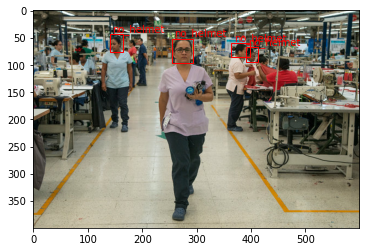

no_helmet 	 4


In [35]:
prediction_image('/content/drive/MyDrive/Factory_helmet_detector/Test/10153.jpg')

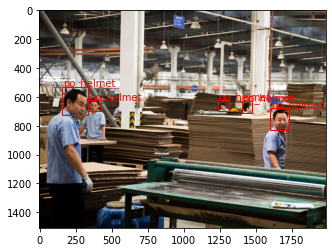

no_helmet 	 5


In [33]:
prediction_image('/content/drive/MyDrive/Factory_helmet_detector/Test/10100.jpg')

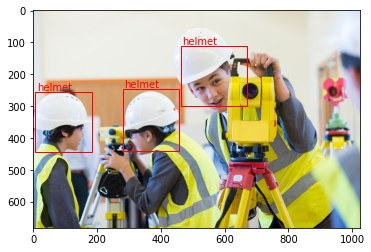

helmet 	 3


In [36]:
prediction_image('/content/drive/MyDrive/Factory_helmet_detector/Test/10104.jpg')